In [7]:
import pandas as pd

path = r"/Users/moazam_a12/Learning Curve/Academia/UET/Semester 6/Introduction to Data Sceince/Project/Datasets/htru2 (D-2)/HTRU_2.csv"

column_names = [
    'Mean_Integrated',                  # 0
    'SD_Integrated',                    # 1
    'Kurtosis_Integrated',             # 2
    'Skewness_Integrated',            # 3
    'Mean_DMF',                         # 4
    'SD_DMF',                           # 5
    'Kurtosis_DMF',                   # 6
    'Skewness_DMF',                  # 7
    'Class'                             # 8
]

# Load dataset
df_htru = pd.read_csv(path, header=None, names=column_names)

# Quick look
df_htru.head()

,Mean_Integrated,SD_Integrated,Kurtosis_Integrated,Skewness_Integrated,Mean_DMF,SD_DMF,Kurtosis_DMF,Skewness_DMF,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
# Check column info
df_htru.info()

# Any missing values?
df_htru.isnull().sum()

# Class distribution
df_htru[df_htru.columns[-1]].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mean_Integrated      17898 non-null  float64
 1   SD_Integrated        17898 non-null  float64
 2   Kurtosis_Integrated  17898 non-null  float64
 3   Skewness_Integrated  17898 non-null  float64
 4   Mean_DMF             17898 non-null  float64
 5   SD_DMF               17898 non-null  float64
 6   Kurtosis_DMF         17898 non-null  float64
 7   Skewness_DMF         17898 non-null  float64
 8   Class                17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Class
0    16259
1     1639
Name: count, dtype: int64

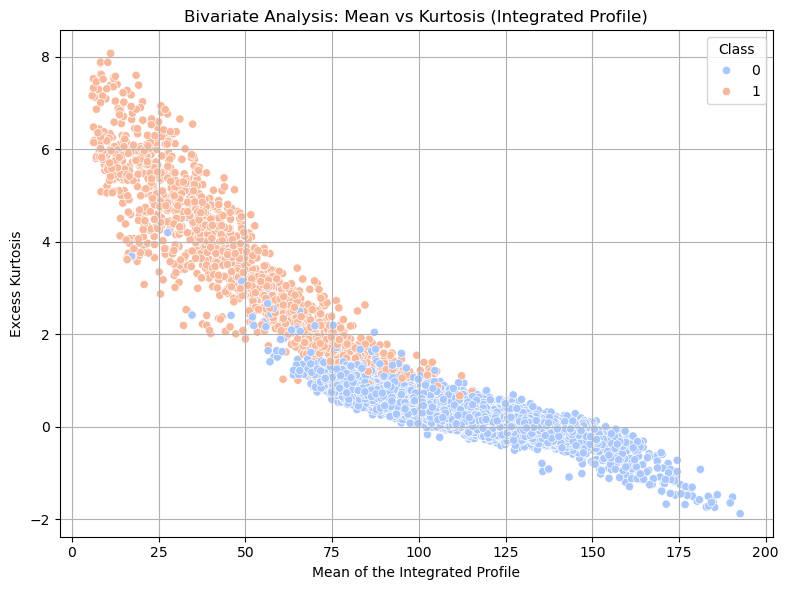

In [11]:
# Bivariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_htru, x='Mean_Integrated', y='Kurtosis_Integrated', hue='Class', palette='coolwarm')
plt.title('Bivariate Analysis: Mean vs Kurtosis (Integrated Profile)')
plt.xlabel('Mean of the Integrated Profile')
plt.ylabel('Excess Kurtosis')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import sys
sys.path.append('/Users/moazam_a12/Learning Curve/Academia/UET/Semester 6/Introduction to Data Sceince/Project')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_htru.drop('Class', axis=1)
y = df_htru['Class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from Models.knn_model import train_knn

knn_acc, knn_cm = train_knn(X_train, y_train, X_test, y_test, n_neighbors=5)

print("KNN Accuracy:", knn_acc)
print("Confusion Matrix:\n", knn_cm)

KNN Accuracy: 0.9804469273743017
Confusion Matrix:
 [[3237   22]
 [  48  273]]


In [21]:
features = df_htru.columns[:-1]  # All features except 'Class'
knn_results = []

for i in range(2, len(features) + 1):
    selected = features[:i]

    X = df_htru[selected]
    y = df_htru['Class']

    # Scale features
    X_scaled = StandardScaler().fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train KNN
    acc, cm = train_knn(X_train, y_train, X_test, y_test, n_neighbors=5)

    knn_results.append({
        'num_features': i,
        'features_used': list(selected),
        'accuracy': acc,
        'confusion_matrix': cm
    })

In [23]:
for r in knn_results:
    print(f"Using {r['num_features']} features: {r['features_used']}")
    print(f"Accuracy: {r['accuracy']:.4f}")
    print("Confusion Matrix:\n", r['confusion_matrix'])
    print("-" * 40)

Using 2 features: ['Mean_Integrated', 'SD_Integrated']
Accuracy: 0.9670
Confusion Matrix:
 [[3230   29]
 [  89  232]]
----------------------------------------
Using 3 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated']
Accuracy: 0.9807
Confusion Matrix:
 [[3242   17]
 [  52  269]]
----------------------------------------
Using 4 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated']
Accuracy: 0.9802
Confusion Matrix:
 [[3241   18]
 [  53  268]]
----------------------------------------
Using 5 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated', 'Mean_DMF']
Accuracy: 0.9827
Confusion Matrix:
 [[3242   17]
 [  45  276]]
----------------------------------------
Using 6 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated', 'Mean_DMF', 'SD_DMF']
Accuracy: 0.9807
Confusion Matrix:
 [[3235   24]
 [  45  276]]
----------------------------------------
Using 7 fe

In [27]:
from Models.naive_bayes_model import train_naive_bayes

nb_results = []

for i in range(2, len(features) + 1):
    selected = features[:i]

    X = df_htru[selected]
    y = df_htru['Class']

    # Scale features
    X_scaled = StandardScaler().fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Naïve Bayes
    acc, cm = train_naive_bayes(X_train, y_train, X_test, y_test)

    nb_results.append({
        'num_features': i,
        'features_used': list(selected),
        'accuracy': acc,
        'confusion_matrix': cm
    })

In [29]:
for r in nb_results:
    print(f"Using {r['num_features']} features: {r['features_used']}")
    print(f"Accuracy: {r['accuracy']:.4f}")
    print("Confusion Matrix:\n", r['confusion_matrix'])
    print("-" * 40)

Using 2 features: ['Mean_Integrated', 'SD_Integrated']
Accuracy: 0.9575
Confusion Matrix:
 [[3191   68]
 [  84  237]]
----------------------------------------
Using 3 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated']
Accuracy: 0.9693
Confusion Matrix:
 [[3201   58]
 [  52  269]]
----------------------------------------
Using 4 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated']
Accuracy: 0.9662
Confusion Matrix:
 [[3195   64]
 [  57  264]]
----------------------------------------
Using 5 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated', 'Mean_DMF']
Accuracy: 0.9581
Confusion Matrix:
 [[3162   97]
 [  53  268]]
----------------------------------------
Using 6 features: ['Mean_Integrated', 'SD_Integrated', 'Kurtosis_Integrated', 'Skewness_Integrated', 'Mean_DMF', 'SD_DMF']
Accuracy: 0.9514
Confusion Matrix:
 [[3136  123]
 [  51  270]]
----------------------------------------
Using 7 fe

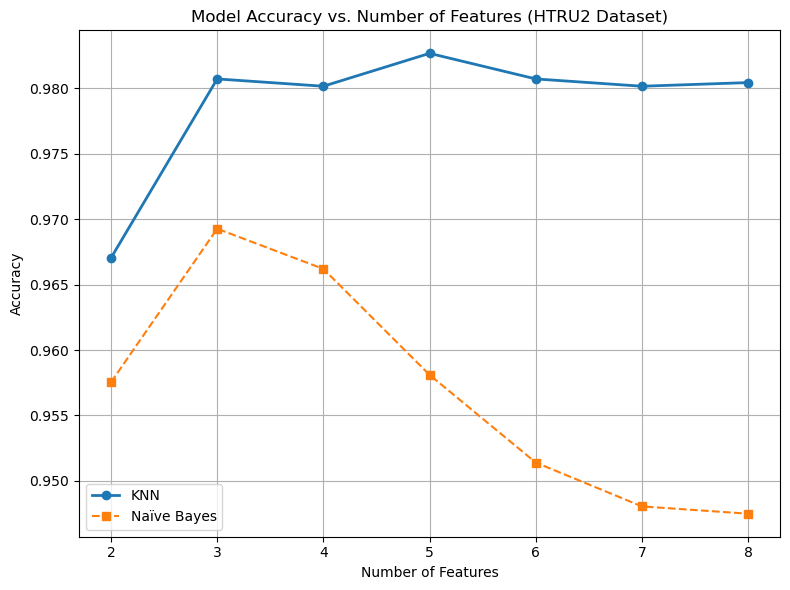

In [31]:
# Comparison

knn_acc = [r['accuracy'] for r in knn_results]
nb_acc = [r['accuracy'] for r in nb_results]
x_feat = [r['num_features'] for r in knn_results]

plt.figure(figsize=(8,6))
plt.plot(x_feat, knn_acc, marker='o', label='KNN', linewidth=2)
plt.plot(x_feat, nb_acc, marker='s', label='Naïve Bayes', linestyle='--')
plt.title('Model Accuracy vs. Number of Features (HTRU2 Dataset)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()